## Aprendizaje automatizado (Machine learning)

## K-means (clustering - Algoritmo no supervisado)

In [2]:
rutaArchivo = './Mall_Customers-2.csv'

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(rutaArchivo, index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.rename({'Annual Income (k$)':'Ingreso', 'Spending Score (1-100)':'Ponderacion'}, axis=1, inplace=True)

In [7]:
df.head()

,Gender,Age,Ingreso,Ponderacion
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Ingreso,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Ponderacion,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [9]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

## Segmentacion tradicional

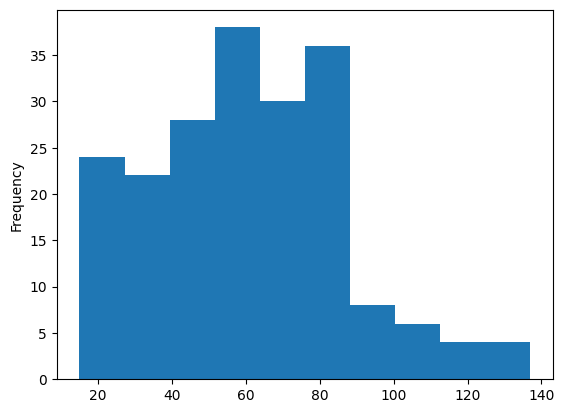

In [10]:
df.Ingreso.plot.hist();

In [11]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

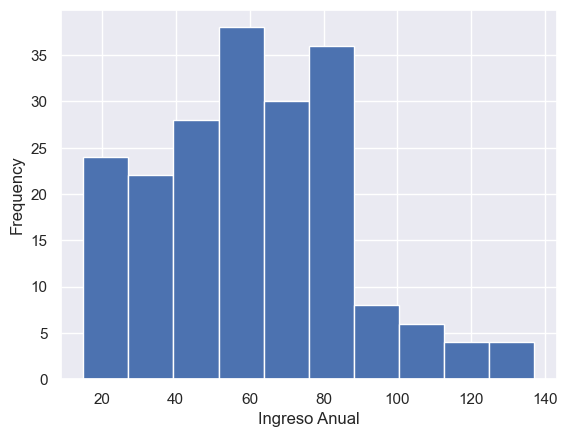

In [12]:
df.Ingreso.plot.hist()
plt.xlabel('Ingreso Anual');

In [13]:
# Si ingreso < 50 Entonces 'Ingreso bajo'
# Si 50 <= ingreso <= 90 entonces 'Ingreso moderado'
# Si ingreso > 90 'Ingreso alto'

In [14]:
import numpy as np

In [15]:
df['Segmento'] = np.where(df.Ingreso >= 90, 'Ingreso alto',
                         np.where(df.Ingreso <50, 'Ingreso bajo', 'Ingreso moderado'))

In [16]:
df

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto
197,Female,45,126,28,Ingreso alto
198,Male,32,126,74,Ingreso alto


In [17]:
df.groupby('Segmento')['Ingreso'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
Ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


## Estandarizacion de datos

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
col_a_escalar = ['Age', 'Ingreso', 'Ponderacion']

In [63]:
datos_a_escalar = df.copy()
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento,Segmento IA
CustomerID,,,,,,
1,Male,19,15,39,Ingreso bajo,2
2,Male,21,15,81,Ingreso bajo,2
3,Female,20,16,6,Ingreso bajo,2
4,Female,23,16,77,Ingreso bajo,2
5,Female,31,17,40,Ingreso bajo,2
...,...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto,1
197,Female,45,126,28,Ingreso alto,0
198,Male,32,126,74,Ingreso alto,1


In [22]:
datos_a_escalar[col_a_escalar] = scaler.fit_transform(df[col_a_escalar])

In [23]:
df.head(10)

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
6,Female,22,17,76,Ingreso bajo
7,Female,35,18,6,Ingreso bajo
8,Female,23,18,94,Ingreso bajo
9,Male,64,19,3,Ingreso bajo


In [24]:
datos_a_escalar.head(10)

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo
6,Female,-1.209269,-1.662660,1.001596,Ingreso bajo
7,Female,-0.276302,-1.624491,-1.715913,Ingreso bajo
8,Female,-1.137502,-1.624491,1.700384,Ingreso bajo
9,Male,1.804932,-1.586321,-1.832378,Ingreso bajo


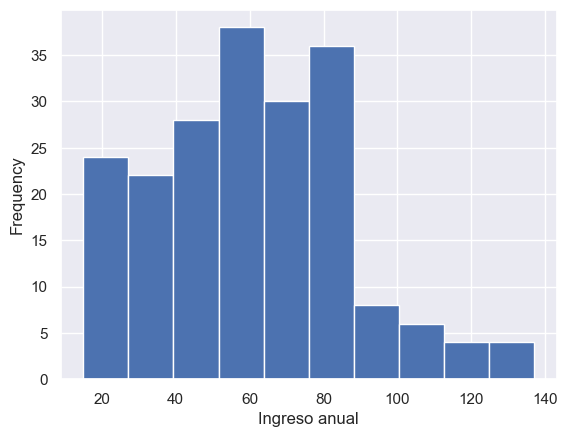

In [25]:
df.Ingreso.plot.hist()
plt.xlabel('Ingreso anual');

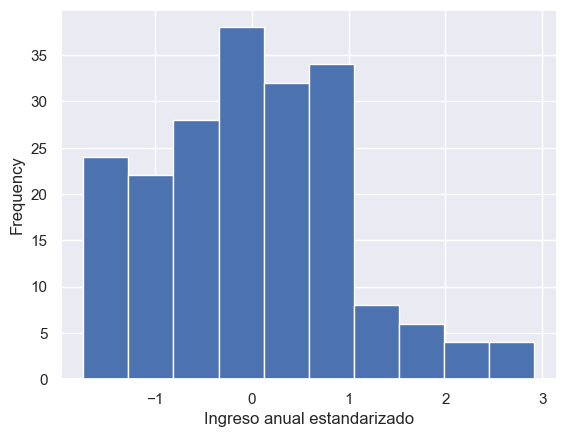

In [26]:
datos_a_escalar.Ingreso.plot.hist()
plt.xlabel('Ingreso anual estandarizado');

In [27]:
cluster_cols = ['Ingreso', 'Ponderacion']
datos_a_escalar[cluster_cols].head()

,Ingreso,Ponderacion
CustomerID,,
1,-1.738999,-0.434801
2,-1.738999,1.195704
3,-1.700830,-1.715913
4,-1.700830,1.040418
5,-1.662660,-0.395980


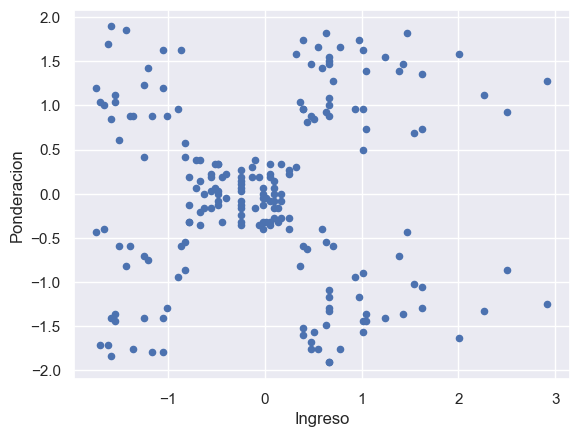

In [28]:
datos_a_escalar.plot.scatter(x='Ingreso', y='Ponderacion');

## Uso de KMenas

In [29]:
from sklearn.cluster import KMeans

In [30]:
modelo = KMeans(n_clusters = 5, random_state=42)

In [31]:
modelo.fit(datos_a_escalar[cluster_cols])

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [32]:
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto
197,Female,0.441365,2.497807,-0.861839,Ingreso alto
198,Male,-0.491602,2.497807,0.923953,Ingreso alto


In [33]:
datos_a_escalar['Cluster2'] = modelo.predict(datos_a_escalar[cluster_cols])

In [34]:
datos_a_escalar.Segmento.value_counts()

Ingreso moderado    106
Ingreso bajo         72
Ingreso alto         22
Name: Segmento, dtype: int64

In [35]:
datos_a_escalar.Cluster2.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Cluster2, dtype: int64

In [36]:
marcador = ['x', '*', '.', '|', '_']

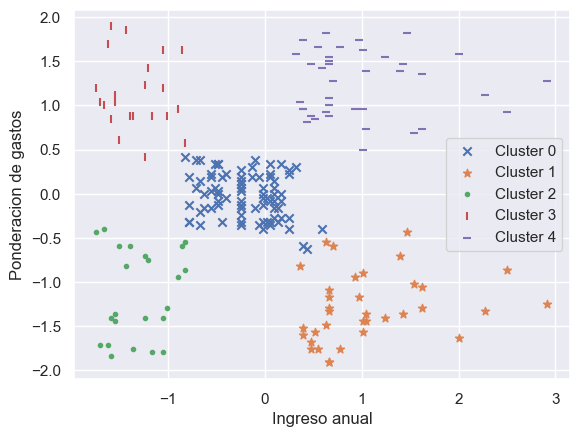

In [37]:
for segmento in range(5):
    temp = datos_a_escalar[datos_a_escalar.Cluster2 == segmento]
    plt.scatter(temp.Ingreso, temp.Ponderacion, marker = marcador[segmento], label = 'Cluster '+ str(segmento))
plt.xlabel('Ingreso anual')
plt.ylabel('Ponderacion de gastos')
plt.legend();

## Utilizando mas de 2 dimensiones para el modelo de Machine learnign

In [38]:
cluster_cols = ['Age', 'Ingreso', 'Ponderacion']
datos_a_escalar[cluster_cols].head()

,Age,Ingreso,Ponderacion
CustomerID,,,
1,-1.424569,-1.738999,-0.434801
2,-1.281035,-1.738999,1.195704
3,-1.352802,-1.700830,-1.715913
4,-1.137502,-1.700830,1.040418
5,-0.563369,-1.662660,-0.395980


In [39]:
modelo2 = KMeans(n_clusters=4, random_state=42)
modelo2.fit(datos_a_escalar[cluster_cols])

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [40]:
datos_a_escalar['Cluster3']= modelo2.predict(datos_a_escalar[cluster_cols])

In [41]:
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento,Cluster2,Cluster3
CustomerID,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo,2,2
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo,3,2
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo,2,2
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo,3,2
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo,2,2
...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto,4,1
197,Female,0.441365,2.497807,-0.861839,Ingreso alto,1,0
198,Male,-0.491602,2.497807,0.923953,Ingreso alto,4,1


In [42]:
from sklearn import decomposition

In [43]:
pca=decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(datos_a_escalar[cluster_cols])

In [44]:
pca_res

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [45]:
datos_a_escalar['pc1'] = pca_res[:,0]
datos_a_escalar['pc2'] = pca_res[:,1]

In [46]:
datos_a_escalar

,Gender,Age,Ingreso,Ponderacion,Segmento,Cluster2,Cluster3,pc1,pc2
CustomerID,,,,,,,,,
1,Male,-1.424569,-1.738999,-0.434801,Ingreso bajo,2,2,-0.615720,-1.763481
2,Male,-1.281035,-1.738999,1.195704,Ingreso bajo,3,2,-1.665793,-1.820747
3,Female,-1.352802,-1.700830,-1.715913,Ingreso bajo,2,2,0.337862,-1.674799
4,Female,-1.137502,-1.700830,1.040418,Ingreso bajo,3,2,-1.456573,-1.772430
5,Female,-0.563369,-1.662660,-0.395980,Ingreso bajo,2,2,-0.038465,-1.662740
...,...,...,...,...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,Ingreso alto,4,1,-1.093705,2.215577
197,Female,0.441365,2.497807,-0.861839,Ingreso alto,1,0,0.800448,2.540748
198,Male,-0.491602,2.497807,0.923953,Ingreso alto,4,1,-1.119709,2.445169


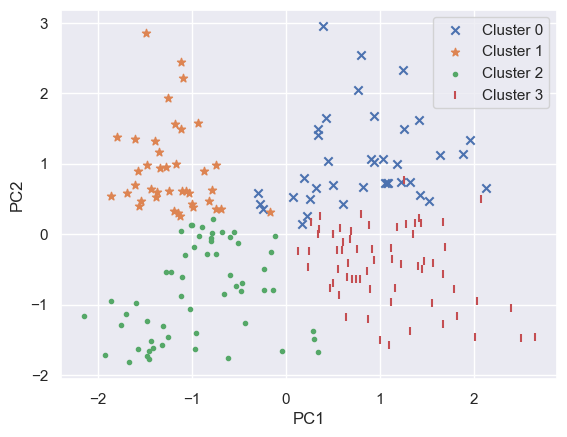

In [47]:
for segmento in range(4):
    temp = datos_a_escalar[datos_a_escalar.Cluster3 == segmento]
    plt.scatter(temp.pc1, temp.pc2, marker = marcador[segmento], label = 'Cluster '+ str(segmento))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend();

In [48]:
df['Segmento IA']=datos_a_escalar.Cluster3

In [49]:
df

,Gender,Age,Ingreso,Ponderacion,Segmento,Segmento IA
CustomerID,,,,,,
1,Male,19,15,39,Ingreso bajo,2
2,Male,21,15,81,Ingreso bajo,2
3,Female,20,16,6,Ingreso bajo,2
4,Female,23,16,77,Ingreso bajo,2
5,Female,31,17,40,Ingreso bajo,2
...,...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto,1
197,Female,45,126,28,Ingreso alto,0
198,Male,32,126,74,Ingreso alto,1


In [50]:
df.groupby('Segmento IA')[col_a_escalar].mean()

,Age,Ingreso,Ponderacion
Segmento IA,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


<AxesSubplot: xlabel='Segmento IA'>

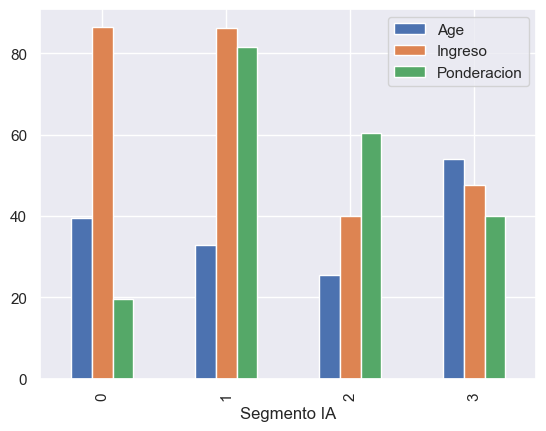

In [51]:
df.groupby('Segmento IA')[col_a_escalar].mean().plot.bar()

In [52]:
col_segmento = ['Ingreso', 'Ponderacion']
x = datos_a_escalar[col_segmento]

In [53]:
puntuacion_inercia = []
for k in range(2,11):
    inercia = KMeans(n_clusters=k,random_state=42).fit(x).inertia_;
    puntuacion_inercia.append(inercia);

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [54]:
puntuacion_inercia

[270.70426664306717,
 157.70400815035947,
 108.92131661364357,
 65.56840815571682,
 55.057348270386,
 44.91118554999014,
 37.73640346254161,
 32.37525368158286,
 29.090568897369717]

In [55]:
clientes = df[['Age','Ingreso','Ponderacion']].copy()

In [56]:
#Creaer modelo
km = KMeans(n_clusters=5,n_init=100,max_iter=1000,init='random')

In [57]:
prediccionKM = km.fit_predict(clientes)

In [58]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [59]:
silhouette_score(clientes,prediccionKM)

0.44428597560893024

In [60]:
calinski_harabasz_score(clientes,prediccionKM)

151.04386000160667

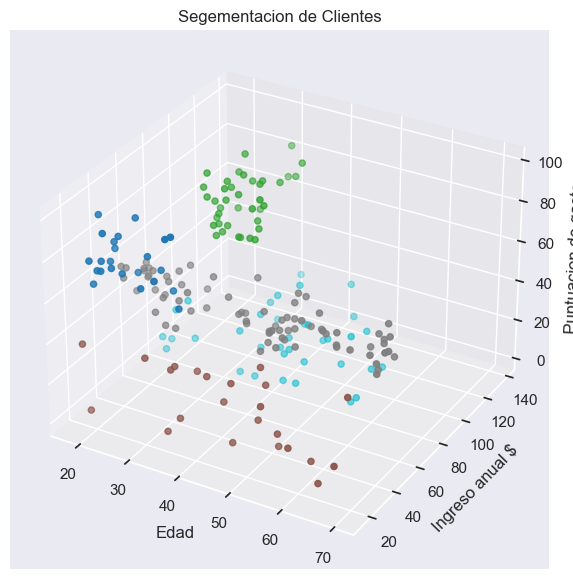

In [61]:
flg = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(clientes['Age'],clientes['Ingreso'],clientes['Ponderacion'],c=prediccionKM,cmap='tab10')
plt.title('Segementacion de Clientes')
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso anual $')
ax.set_zlabel('Puntuacion de gastos')
plt.show();

In [62]:
%matplotlib notebook